In [12]:
import pandas as pd
df =pd. read_csv("/Users/Mac/Downloads/articles.csv",encoding = 'ISO 8859-1')
df


,Id,Heading,Article.Banner.Image,Outlets,Article.Description,Full_Article,Article_Type,Tonality
0,d6995462-5e87-453b-b64d-e9f1df6e94d2,"A Puzzling Maneuver, Then Freefall: NTSB Repor...",NaN,Essex Caller,<p>The helicopter that crashed in Southeast Al...,<p>The helicopter that crashed in Southeast Al...,Commercial,Negative
1,8b05e939-a89e-4548-b92b-013822e8ee7d,Bells Nexus Air Taxi Concept Rings Changes Fo...,NaN,Aviation Week Network,<p>A year after teasing the fledgling electric...,<p>A year after teasing the fledgling electric...,Commercial,Positive
2,69fcd400-bceb-4255-8277-619f2d68ac0b,Bell Helicopter Show Air Taxi Nexus,http://images.tmtpost.com/uploads/images/2019/...,TMTPost,<p>Bell released the full-size design of the v...,<p>Bell released the full-size design of the v...,Commercial,Positive
3,17943578-c11b-414b-b3f5-063d3a93157b,BELL DÉVOILE LA CONCEPTION INTÉGRALE DE SON TA...,http://www.fredzone.org/wp-content/uploads/201...,Fredzone,<p>Bell est une soci&eacute;t&eacute; am&eacut...,<p>Bell est une soci&eacute;t&eacute; am&eacut...,Commercial,Positive
4,f33c7b11-5f77-4a98-bb2e-d36689042aea,Les premiers retours dOlivier Ezratty,NaN,FrenchWeb,<p>It was still anecdotal to observe the explo...,<p>It was still anecdotal to observe the explo...,Commercial,Positive
...,...,...,...,...,...,...,...,...
4300,a40e5017-0a38-4d06-bcbe-616b73456c94,"Chinook Catches Army Flirting With Younger, Th...",https://www.duffelblog.com/wp-content/uploads/...,Duffel Blog,Long rumored tensions came to a head as the CH...,<p>Long rumored tensions came to a head as the...,Military,NaN
4301,782ba519-bcb0-4ef1-873d-713a18b04576,Lufthansa Aviation Selects Reiser Simulation H...,NaN,Vertical,<p>In the course of upcoming investments in ne...,<p>In the course of upcoming investments in ne...,Commercial,Positive
4302,deb31e5d-15c0-4c1d-843c-ce02e9081746,This Bell Flight Drone Wont Be Delivering Pizza,NaN,"WFAA-TV ABC (Dallas, TX)","<p>At Bell Flight in Fort Worth, engineers are...","<p>At Bell Flight in Fort Worth, engineers are...",Military,Positive
4303,f7125b1d-a687-469b-a799-c8cb4443b1d1,Blade Offers New York Airport Transfers for $1...,https://assets.bwbx.io/images/users/iqjWHBFdfx...,Bloomberg,<p>Getting to this price point took about five...,<p>Getting to this price point took about five...,Commercial,Positive


In [13]:
df.columns

Index(['Id', 'Heading', 'Article.Banner.Image', 'Outlets',
       'Article.Description', 'Full_Article', 'Article_Type', 'Tonality'],
      dtype='object')

In [14]:
df.drop(['Id', 'Heading', 'Article.Banner.Image', 'Outlets',
       'Article.Description','Article_Type', 'Tonality'],axis=1,inplace=True)

df.head()

,Full_Article
0,<p>The helicopter that crashed in Southeast Al...
1,<p>A year after teasing the fledgling electric...
2,<p>Bell released the full-size design of the v...
3,<p>Bell est une soci&eacute;t&eacute; am&eacut...
4,<p>It was still anecdotal to observe the explo...


In [15]:
df['Full_Article'] = df['Full_Article'].astype(str).str.lower()
df

,Full_Article
0,<p>the helicopter that crashed in southeast al...
1,<p>a year after teasing the fledgling electric...
2,<p>bell released the full-size design of the v...
3,<p>bell est une soci&eacute;t&eacute; am&eacut...
4,<p>it was still anecdotal to observe the explo...
...,...
4300,<p>long rumored tensions came to a head as the...
4301,<p>in the course of upcoming investments in ne...
4302,"<p>at bell flight in fort worth, engineers are..."
4303,<p>getting to this price point took about five...


In [20]:
from nltk.tokenize import RegexpTokenizer

regexp = RegexpTokenizer('\w+')

df['text_token']=df['Full_Article'].apply(regexp.tokenize)
df.head(3)

,Full_Article,text_token
0,<p>the helicopter that crashed in southeast al...,"[p, the, helicopter, that, crashed, in, southe..."
1,<p>a year after teasing the fledgling electric...,"[p, a, year, after, teasing, the, fledgling, e..."
2,<p>bell released the full-size design of the v...,"[p, bell, released, the, full, size, design, o..."


In [21]:
import nltk
from nltk.corpus import stopwords
stopwords = nltk.corpus.stopwords.words("english")

# Extend the list with your own custom stopwords
my_stopwords = ['https']
stopwords.extend(my_stopwords)
df['text_token'] = df['text_token'].apply(lambda x: [item for item in x if item not in stopwords])
df.head(3)

,Full_Article,text_token
0,<p>the helicopter that crashed in southeast al...,"[p, helicopter, crashed, southeast, alaska, la..."
1,<p>a year after teasing the fledgling electric...,"[p, year, teasing, fledgling, electric, vertic..."
2,<p>bell released the full-size design of the v...,"[p, bell, released, full, size, design, vertic..."


In [24]:
df['text_string'] = df['text_token'].apply(lambda x: ' '.join([item for item in x if len(item)>2]))
df[['Full_Article', 'text_token', 'text_string']].head()

,Full_Article,text_token,text_string
0,<p>the helicopter that crashed in southeast al...,"[p, helicopter, crashed, southeast, alaska, la...",helicopter crashed southeast alaska late septe...
1,<p>a year after teasing the fledgling electric...,"[p, year, teasing, fledgling, electric, vertic...",year teasing fledgling electric vertical takeo...
2,<p>bell released the full-size design of the v...,"[p, bell, released, full, size, design, vertic...",bell released full size design vertical take l...
3,<p>bell est une soci&eacute;t&eacute; am&eacut...,"[p, bell, est, une, soci, eacute, eacute, eacu...",bell est une soci eacute eacute eacute ricaine...
4,<p>it was still anecdotal to observe the explo...,"[p, still, anecdotal, observe, explosion, pass...",still anecdotal observe explosion passenger dr...


In [25]:
#Create a list of all words
all_words = ' '.join([word for word in df['text_string']])
#Tokenize all_words   # using punket 

tokenized_words = nltk.tokenize.word_tokenize(all_words)



In [26]:
#Create a frequency distribution which records the number of times each word has occurred:
from nltk.probability import FreqDist

fdist = FreqDist(tokenized_words)
fdist

FreqDist({'nbsp': 3705, 'bell': 2396, 'helicopter': 2387, 'helicopters': 1790, 'air': 1527, 'aircraft': 1308, 'airbus': 999, 'new': 846, 'company': 781, 'taxi': 680, ...})

In [27]:
df['text_string_fdist'] = df['text_token'].apply(lambda x: ' '.join([item for item in x if fdist[item] >= 1 ]))
df[['Full_Article', 'text_token', 'text_string', 'text_string_fdist']].head()

,Full_Article,text_token,text_string,text_string_fdist
0,<p>the helicopter that crashed in southeast al...,"[p, helicopter, crashed, southeast, alaska, la...",helicopter crashed southeast alaska late septe...,helicopter crashed southeast alaska late septe...
1,<p>a year after teasing the fledgling electric...,"[p, year, teasing, fledgling, electric, vertic...",year teasing fledgling electric vertical takeo...,year teasing fledgling electric vertical takeo...
2,<p>bell released the full-size design of the v...,"[p, bell, released, full, size, design, vertic...",bell released full size design vertical take l...,bell released full size design vertical take l...
3,<p>bell est une soci&eacute;t&eacute; am&eacut...,"[p, bell, est, une, soci, eacute, eacute, eacu...",bell est une soci eacute eacute eacute ricaine...,bell est une soci eacute eacute eacute ricaine...
4,<p>it was still anecdotal to observe the explo...,"[p, still, anecdotal, observe, explosion, pass...",still anecdotal observe explosion passenger dr...,still anecdotal observe explosion passenger dr...


In [28]:
#perfom lemmatization.
from nltk.stem import WordNetLemmatizer

wordnet_lem = WordNetLemmatizer()

df['text_string_lem'] = df['text_string_fdist'].apply(wordnet_lem.lemmatize)

In [29]:
#Note that in some datasets, there are no words to lemmatize. We can check this as follows:
#check if the columns are equal
df['is_equal']= (df['text_string_fdist']==df['text_string_lem'])

# show level count
df.is_equal.value_counts()

True    4305
Name: is_equal, dtype: int64

In [30]:
df

,Full_Article,text_token,text_string,text_string_fdist,text_string_lem,is_equal
0,<p>the helicopter that crashed in southeast al...,"[p, helicopter, crashed, southeast, alaska, la...",helicopter crashed southeast alaska late septe...,helicopter crashed southeast alaska late septe...,helicopter crashed southeast alaska late septe...,True
1,<p>a year after teasing the fledgling electric...,"[p, year, teasing, fledgling, electric, vertic...",year teasing fledgling electric vertical takeo...,year teasing fledgling electric vertical takeo...,year teasing fledgling electric vertical takeo...,True
2,<p>bell released the full-size design of the v...,"[p, bell, released, full, size, design, vertic...",bell released full size design vertical take l...,bell released full size design vertical take l...,bell released full size design vertical take l...,True
3,<p>bell est une soci&eacute;t&eacute; am&eacut...,"[p, bell, est, une, soci, eacute, eacute, eacu...",bell est une soci eacute eacute eacute ricaine...,bell est une soci eacute eacute eacute ricaine...,bell est une soci eacute eacute eacute ricaine...,True
4,<p>it was still anecdotal to observe the explo...,"[p, still, anecdotal, observe, explosion, pass...",still anecdotal observe explosion passenger dr...,still anecdotal observe explosion passenger dr...,still anecdotal observe explosion passenger dr...,True
...,...,...,...,...,...,...
4300,<p>long rumored tensions came to a head as the...,"[p, long, rumored, tensions, came, head, ch, 4...",long rumored tensions came head chinook helico...,long rumored tensions came head chinook helico...,long rumored tensions came head chinook helico...,True
4301,<p>in the course of upcoming investments in ne...,"[p, course, upcoming, investments, new, traini...",course upcoming investments new training equip...,course upcoming investments new training equip...,course upcoming investments new training equip...,True
4302,"<p>at bell flight in fort worth, engineers are...","[p, bell, flight, fort, worth, engineers, work...",bell flight fort worth engineers working drone...,bell flight fort worth engineers working drone...,bell flight fort worth engineers working drone...,True
4303,<p>getting to this price point took about five...,"[p, getting, price, point, took, five, years, ...",getting price point took five years ldquo bega...,getting price point took five years ldquo bega...,getting price point took five years ldquo bega...,True


In [31]:
all_words_lem = ' '.join([word for word in df['text_string_lem']])

In [36]:
#Frequency distributions
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist

words = nltk.word_tokenize(all_words_lem)
fd = FreqDist(words)



In [37]:
fd.most_common(3)

[('nbsp', 3705), ('bell', 2396), ('helicopter', 2387)]

In [38]:
fd.tabulate(3)

      nbsp       bell helicopter 
      3705       2396       2387 


In [46]:
top_10 = fd.most_common(10)

# Create pandas series to make plotting easier
fdist = pd.Series(dict(top_10))



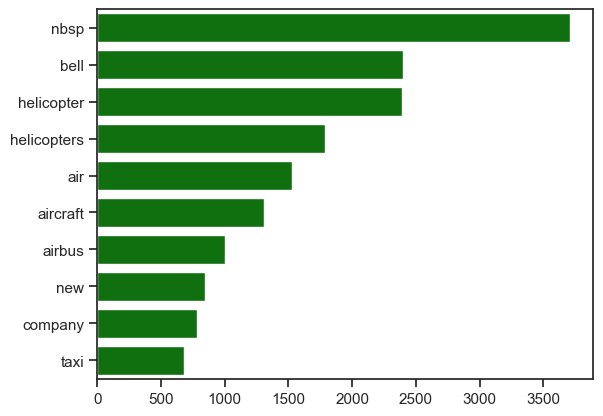

In [47]:
import seaborn as sns
sns.set_theme(style="ticks")

sns.barplot(y=fdist.index, x=fdist.values, color='green');

In [41]:
from nltk.sentiment import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()
df['polarity'] = df['text_string_lem'].apply(lambda x: analyzer.polarity_scores(x))
df.tail(3)

,Full_Article,text_token,text_string,text_string_fdist,text_string_lem,is_equal,polarity
4302,"<p>at bell flight in fort worth, engineers are...","[p, bell, flight, fort, worth, engineers, work...",bell flight fort worth engineers working drone...,bell flight fort worth engineers working drone...,bell flight fort worth engineers working drone...,True,"{'neg': 0.05, 'neu': 0.811, 'pos': 0.139, 'com..."
4303,<p>getting to this price point took about five...,"[p, getting, price, point, took, five, years, ...",getting price point took five years ldquo bega...,getting price point took five years ldquo bega...,getting price point took five years ldquo bega...,True,"{'neg': 0.054, 'neu': 0.912, 'pos': 0.035, 'co..."
4304,<p>lebanon is to receive a new $120 million us...,"[p, lebanon, receive, new, 120, million, us, m...",lebanon receive new 120 million military aid p...,lebanon receive new 120 million military aid p...,lebanon receive new 120 million military aid p...,True,"{'neg': 0.158, 'neu': 0.789, 'pos': 0.054, 'co..."


In [43]:
df = pd.concat(
    [df.drop(['Full_Article', 'polarity'], axis=1), 
     df['polarity'].apply(pd.Series)], axis=1)
df.head(3)

,text_token,text_string,text_string_fdist,text_string_lem,is_equal,neg,neu,pos,compound
0,"[p, helicopter, crashed, southeast, alaska, la...",helicopter crashed southeast alaska late septe...,helicopter crashed southeast alaska late septe...,helicopter crashed southeast alaska late septe...,True,0.094,0.789,0.117,0.0258
1,"[p, year, teasing, fledgling, electric, vertic...",year teasing fledgling electric vertical takeo...,year teasing fledgling electric vertical takeo...,year teasing fledgling electric vertical takeo...,True,0.051,0.949,0.000,-0.2023
2,"[p, bell, released, full, size, design, vertic...",bell released full size design vertical take l...,bell released full size design vertical take l...,bell released full size design vertical take l...,True,0.000,0.902,0.098,0.3612


In [44]:
df['sentiment'] = df['compound'].apply(lambda x: 'positive' if x >0 else 'neutral' if x==0 else 'negative')
df.head(4)

,text_token,text_string,text_string_fdist,text_string_lem,is_equal,neg,neu,pos,compound,sentiment
0,"[p, helicopter, crashed, southeast, alaska, la...",helicopter crashed southeast alaska late septe...,helicopter crashed southeast alaska late septe...,helicopter crashed southeast alaska late septe...,True,0.094,0.789,0.117,0.0258,positive
1,"[p, year, teasing, fledgling, electric, vertic...",year teasing fledgling electric vertical takeo...,year teasing fledgling electric vertical takeo...,year teasing fledgling electric vertical takeo...,True,0.051,0.949,0.000,-0.2023,negative
2,"[p, bell, released, full, size, design, vertic...",bell released full size design vertical take l...,bell released full size design vertical take l...,bell released full size design vertical take l...,True,0.000,0.902,0.098,0.3612,positive
3,"[p, bell, est, une, soci, eacute, eacute, eacu...",bell est une soci eacute eacute eacute ricaine...,bell est une soci eacute eacute eacute ricaine...,bell est une soci eacute eacute eacute ricaine...,True,0.000,0.927,0.073,0.5106,positive


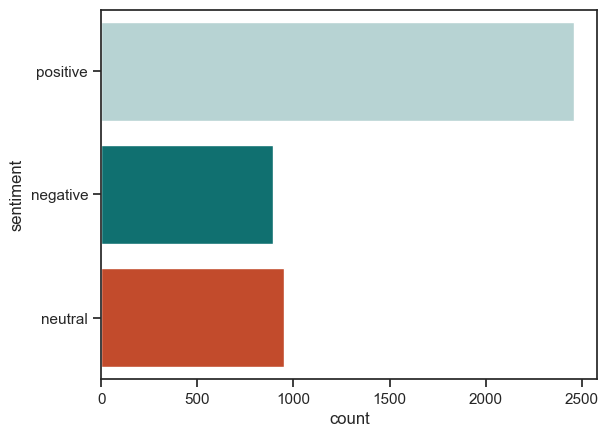

In [45]:
sns.countplot(y='sentiment', data=df, palette=['#b2d8d8',"#008080", '#db3d13']);